# COMM054 Data Science Principles and Practices Coursework
### Name:Swathi Vijayan
### URN: 6676660

## Task 1:Maximum Likelihood Estimation and Maximum A Posteriori

Maximum Likelihood estimation is a technique for creating parameter estimators. It selects the parameter that gives the likelihood function the highest value.

The goal of Maximum A Posteriori (MAP) inference is to discover parameters that maximise the posterior distribution. Rather than producing distributions, it generates single-value estimates of model parameters.

If the prior is uniform (flat), maximum likelihood inference and MAP inference are equivalent

In this task,the key concepts of MLE and MAP is adressed and how it is implemeted in the code is shown.This is done by fitiing the data using the Poisson and Negative binomial distribution.

### Dataset
‘Quiet Flows the Don’ was a book written by Russian novelist Mikhail Sholokhov,who was awarded the Nobel prize for literature in 1965. However there was some controversy about the authorship of the novel, with some claiming it had actually been written by another author.For investigating , a statistical analysis of the text in the book was performed,considering the distribution of sentence lengths in the book. The first step of the statistical analysis is to fit a probability distribution to these sentence lengths.

### Importing the required libraries

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize as mini
from scipy.stats import poisson as poi
from scipy.stats import gamma
import statistics
import seaborn as sns
import statsmodels.api as sm

In [205]:
#To remove any warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Import Dataset

In [38]:
dataset=pd.read_csv("QuietDonSentenceLengths.csv",header=None)

In [389]:
dataset.head(5)

,Length
0,6
1,25
2,12
3,10
4,16


In [44]:
dataset.columns = ['Length']

In [326]:
dataset.head(5)

,Length
0,6
1,25
2,12
3,10
4,16


In [46]:
len(dataset)

3760

In [47]:
mean = dataset['Length'].mean()

In [48]:
mean

12.67313829787234

In [49]:
sigma=dataset['Length'].std()

In [50]:
sigma

9.124034996812505

In [269]:
variance=dataset['Length'].var()

In [270]:
variance

83.24801462305936

## Maximum Likelihood Estimation

### Poisson Distribution 

A Poisson distribution is a probability distribution that may be used to estimate how many times an event will occur over a certain time period. To put it another way, it's a count distribution.It is a discrete function, which means the variable may only take particular values from a (possibly endless) set of possibilities.The number of occurences is expected to be constant throughout the experiment.

p(x;$\lambda$ ))= $\lambda {^x}*exp{^-\lambda}$/x!
Here lambda is the average number of events and x is the observed datapoint.

The pmf of poisson distribution can be written as
$P[Y=y]= e^{−\mu} \frac{\mu^y}{y!} $,

where $\mu$ is the parameter. 


We can **fit** function to estimate the parameter of the Poisson distribution. 

In [92]:
X = np.ones_like(dataset)
res = sm.Poisson(dataset,X).fit()
print(res.summary())
np.exp(res.params)

Optimization terminated successfully.
         Current function value: 4.947456
         Iterations 1
                          Poisson Regression Results                          
Dep. Variable:                 Length   No. Observations:                 3760
Model:                        Poisson   Df Residuals:                     3759
Method:                           MLE   Df Model:                            0
Date:                Mon, 31 May 2021   Pseudo R-squ.:                   0.000
Time:                        18:27:49   Log-Likelihood:                -18602.
converged:                       True   LL-Null:                       -18602.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5395      0.005    554.347      0.000       2.531       2.548


const    12.673138
dtype: float64

In [94]:
log = poi.logpmf(dataset,mu=mean)
np.sum(log)

-18602.43353218632

In [243]:
def f(mu):
    log_likely = np.sum(poi.logpmf(dataset,mu=mu))
    return -log_likely

Here in the function described above,it calculates the product of individual product densities in logarithmic form for the parameter mu.

In [248]:
f(mean)

18602.43353218632

The loglikelihood is determined using the random parameter (mu). The best parameter is chosen by calculating the largest loglikelihood estimate. To do this, we'll utilise a library function for searching through the parameter mu

In [246]:
mini(f,1)

      fun: 18602.43353218634
 hess_inv: array([[9.4587449e-11]])
      jac: array([0.00073242])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 54
      nit: 13
     njev: 27
   status: 2
  success: False
        x: array([12.6731379])

The minimize function is used from the scipy library which can reduce the size of the function.Here we attempt to maximise the log likelihood uing this function.

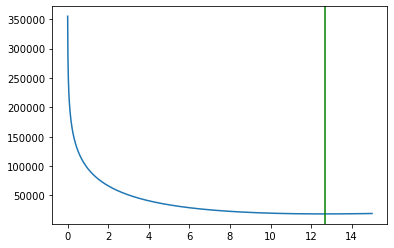

In [247]:
mus = np.linspace(0,15,3760) # create an array of 3760 values from mean of 0 to 13

ys = [] # create an empty list of y coordinates
for mu in mus: # for each value of mu in the range
    ys.append(f(mu)) # add func(mus,dataset) to the list of y coordinates

plt.plot(mus,ys) # plot a line for the negative log likelihood
plt.axvline(mean,color='green')

The likelihood changes as the average value is changed, as seen in this graph. The correspoding mean value of the largest probability estimate is indicated by the vertical line. In our data, the best parameter for the mean is 12.67, which is the best probability estimate.

Here we can expect an average of 12.67 length sentences which are written by the Russian Author

### Negative Binomial distribution

In probability theory and statistics, the negative binomial distribution mimics the number of wins in a sequence of independent and identically distributed Bernoulli trials before a specified (non-random) number of failures (denoted r) occurs.Unlike the Poisson regression, the negative binomial distribution contains an additional parameter that alters the variance independently of the mean.When there are large number of counts,usually this is preferred.The variance of data that follows a negative binomial distribution is frequently higher than the mean.

We can consider a Negative Binomial Distribution for count data with log_likelihood function expressed as:

$$\mathcal{L}(\beta_j; y, \alpha) = \sum_{i=1}^n y_i ln
\left ( \frac{\alpha exp(X_i^T\beta)}{1+\alpha exp(X_i'\beta)} \right ) -
\frac{1}{\alpha} ln(1+\alpha exp(X_i^T\beta)) + ln \Gamma (y_i + 1/\alpha) - ln \Gamma (y_i+1) - ln \Gamma (1/\alpha)$$

In [32]:
from statsmodels.discrete.discrete_model import NegativeBinomial

In [144]:
X = np.ones_like(dataset)
res_binom = sm.NegativeBinomial(dataset,X).fit()
print(res_binom.summary())
np.exp(res_binom.params)

Optimization terminated successfully.
         Current function value: 3.417881
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
                     NegativeBinomial Regression Results                      
Dep. Variable:                 Length   No. Observations:                 3760
Model:               NegativeBinomial   Df Residuals:                     3759
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:              -1.942e-12
Time:                        08:20:02   Log-Likelihood:                -12851.
converged:                       True   LL-Null:                       -12851.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5395      0.011    230.9

const    12.673138
alpha     1.455854
dtype: float64

From the above,we can see that the beta and alpha coeffiencts are 2.5395 and 0.3756 respectively.s the dispersion parameter's estimate. The data is not spread if the dispersion parameter is 0. If alpha is bigger than zero, the data is distributed too much. Sentence length data is a scattered data in our situation.

Also we could abserve that the value of log-likelihhod is 12851 and the average of the Negative binomial data is 12.67
Based on the MLE estimates of negative binomial regression, weobserve roughly 12.67 length sentences in the book "Quiet Flows the Don" (stats model). We discovered that the highest probability estimate is 12,581 and the associated mean is 12.67.This is almost near to the mean

In [387]:
from scipy.stats import nbinom
def f_binom(mu_nbinom):
    p=mu_nbinom/variance
    r = p * mu_nbinom / (1-p)
    loglikelihood_nbinom = (nbinom.logpmf(dataset, r, p))
    return -np.sum(loglikelihood_nbinom)

Here nbinom takes two parameters, p and r, where p is the probability of success. In the same way, we have the value of r. The above function creates the products of each individual data point in the dataset's separate probailities densities in logarithmic form.

In [342]:
f_binom(1)

12867.561209002497

The corresponding loglikelihood is determined once the random parameter (mu) is specified. However, we must select the best parameter (mu) for our data, which we may accomplish by calculating the maximum loglikelihood estimate. 

In [344]:
mini(f_binom,1) 

      fun: 12867.561209002497
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1.])

We are attempting to maximise loglikelihood in this minimise function, which is comparable to attempting to reduce loglikelihood.

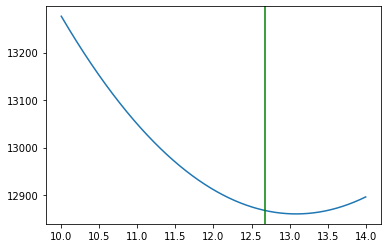

In [388]:
mus = np.linspace(10,14,1000) # create an array of 3760 values from mean of 0 to 13

ys = [] # create an empty list of y coordinates
for mu in mus: # for each value of mu in the range
    ys.append(f_binom(mu)) # add func(mus,dataset) to the list of y coordinates

plt.plot(mus,ys) # plot a line for the negative log likelihood
plt.axvline(mean,color='green')

The likelihood changes as the average value is changed, as seen in this graph. The correspoding mean value of the largest probability estimate is indicated by the vertical line. In our data, the best parameter for the mean is 12.67, which is the best probability estimate. 

### Fit of Poisson and Binomial Distribution

This can be compared by fitting the data and comparing with the AIC and BIC values.

In [349]:
aic_poi=sm.Poisson(dataset, X).fit()
aic_binom= sm.NegativeBinomial(dataset, X).fit()

Optimization terminated successfully.
         Current function value: 4.947456
         Iterations 1
Optimization terminated successfully.
         Current function value: 3.417881
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5


In [350]:
aic_poi_value=aic_poi.aic
aic_binom_value=aic_binom.aic

In [351]:
print("The AIC value of the Poisson regression is:",aic_poi_value)
print("The AIC value of Negative Binomial Distribution is:",aic_binom_value)

The AIC value of the Poisson regression is: 37206.86706437265
The AIC value of Negative Binomial Distribution is: 25706.463131632012


To evaluate how well a model fits into the data, the AIC approach is utilised. When the AUC value is smaller, the model fits better. The AIC value of the Negative Binomial Distribution is lower in this case. As a result, it is more appropriate than Poisson.

In [353]:
bic_poi_value=aic_poi.bic
bic_binom_value=aic_binom.bic

In [354]:
print("The BIC value of the Poisson regression is:",bic_poi_value)
print("The BIC value of Negative Binomial Distribution is:",bic_binom_value)

The BIC value of the Poisson regression is: 37213.09923860904
The BIC value of Negative Binomial Distribution is: 25718.92748010478


The Bayesian information criterion(BIC) is a model selection criteria in statistics that favours the model with the lowest BIC among a limited number of models..Here the BIC value of Negative Binomial Distribution is lesser.As a result it matches better than Poisson.

**Conclusion**
The model is reduced to the simpler poisson model when the dispersion value is set to zero. When compared to the poisson model, the negative binomial model fits (estimates) our data better.

## Maximum A Posterior (MAP) Inference

The MAP interface seeks to discover the parameters that maximise the posterior rather than maximising the probablity alone. The posterior can be defined as the product of the model's probability and the parameters' priors.Prior is an expected distribution of likelihood parameters vector.

$\log p(\mu|x,\sigma) \propto \left(\sum_i \log p(x_i|\mu,\sigma)\right) + \log p(\mu)$
𝑝(𝜇|𝑥,𝜎) is the posterior probability of the parameters in the data,𝑝(𝑥𝑖|𝜇,𝜎)id the Likelihood and 𝑝(𝜇) is prior

The methodology we use to execute the MAP interface is similar to that of the greatest likelihood technique. The log of posterior density is found here using a function.Here the negative log posterior density is minimised rather than maximising the log posterior density. Because of the prior that we bring in here, the answer we receive here will change significantly from the MLE technique.

We'll use the Gamma distribution as a prior distribution, with a shape of 4.0 and a scale of 0.1, to do MAP inference on our data. The Poisson distribution is used to calculate our chance of success. We'll use MAP inference to maximise the posterior density by applying a prior to our likelihood (in log form).

In [254]:
def map_posterior(mu):
    loglikelihood_map = poi.logpmf(dataset,mu)
    loglikelihood_pred = np.sum(loglikelihood_map)
    prior = gamma.logpdf(mu,a=4.0,loc=0,scale=0.1)
    out=loglikelihood_pred+prior
    return -(out)

In [255]:
mini(map_posterior,1)

      fun: 18713.967526417895
 hess_inv: array([[0.00307098]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 12
     njev: 14
   status: 0
  success: True
        x: array([12.64031813])

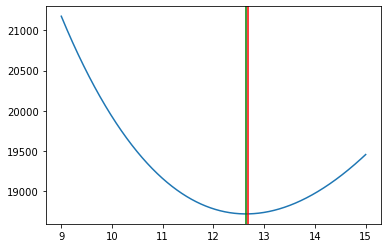

In [268]:
mus_1 = np.linspace(9,15,3760) # create an array of 1000 values from -10 to 30.

ys_1 = [] # create an empty list of y coordinates
for mu_1 in mus_1: # for each value of mu in the range
    ys_1.append(map_posterior(mu_1)) # add f(mu) to the list of y coordinates
    
plt.plot(mus_1,ys_1) # plot a line for the negative log likelihood

ml_estimate = mean
map_estimate = mini(map_posterior,1).x

plt.axvline(ml_estimate,color='red') # add a red vertical line at the ML estimate of mu
plt.axvline(map_estimate,color='green')

In the given graph,we can see that the green line represents MAP and red line represents MLE.Here MAP is slightly lower due to the effetc of prior which is the gamma distribution of shape 4 and scale 1.
From both MAP and MLE estimates,we can see that the average value is around 12.6.

### Conclusion

The goal of MAP inference is to discover parameters that maximise the posterior distribution's posterior distribution. It generates single value estimates of model parameters rather than distributions, just as MLE. In that way, it is extremely similar to the MLE. The maximal lieklikood inference and MAP inference are now equal if the prior is uniform or flat.

## Task 2: Classification of Naive Bayes and Logistic Regression

The workings of Naive Bayes and Logistic Regression utilising a dataset are explained in this task. It also explains how this will predict the label of occurrences and discusses the outcomes.

### Dataset
A large dataset called ATLAS-data.csv and its corresponding labels called ATLAS_Labels.csv are presented here.This was originally produced as part of an open machine learning challenge to develop methods for detecting Higgs bosons from data generated by the ATLAS detector.The values in ATLAS-data.csv are continuous values and contains 29 measurements for 10000 events. ATLAS-labels.csv contains labels for these 10000 events.Measurements are assumed to follow gaussian distribution, since values are not discrete.

Here the label of differet events have to be predicted which means to find whether the given measurements belong to a backgroud event or a signal event.0 corresponds to background events and 1 to signal events.

Mainly used libraries are sklearn,scipy,numpy

### Importing the required libraries

In [146]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale  #for scaling the data
from sklearn.naive_bayes import GaussianNB  #importing module for fitting
from sklearn.model_selection import train_test_split  #for spliting data into train and test sets
from sklearn import metrics #for evaluation,confusion matrix
from sklearn.linear_model import LogisticRegression  #importing module for fitting
import seaborn as sns # for visualisaton
from sklearn.metrics import roc_curve, auc #for roc curves
from sklearn import datasets, metrics, model_selection, svm 

### Loading the dataset

For Classification of any problem,the first step is loading the dataset.The input data is taken from the ATLAS dataset.This consists of various measurements for predicting the type of the event generated by a simulation of the ATLAS detector at CERN.
The output is to predict whther it is a background event or signal event.

In [147]:
dataset2 = np.loadtxt("ATLAS-data.csv",delimiter=',')
labels = np.loadtxt("ATLAS-labels.csv",delimiter=',')

In [148]:
dataset2

array([[243.128,  96.455, 158.618, ...,  -1.651,  -1.445, 157.638],
       [139.751,  74.028, 111.619, ...,  -1.849,   0.664,  68.614],
       [116.217,  73.136,  59.239, ...,   1.442,  -2.288, 140.669],
       ...,
       [131.185,  25.942, 101.981, ...,   0.459,  -0.292, 172.392],
       [142.063,  27.807, 114.4  , ...,   2.913,   0.296, 118.251],
       [ 87.491,  21.139,  65.681, ...,   0.289,   2.719, 266.893]])

In [149]:
labels

array([0., 0., 0., ..., 1., 1., 0.])

### Plotting the data
The dataset and labels seen are plotted using pyplot


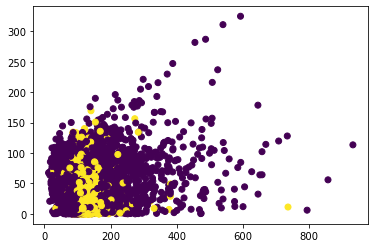

In [150]:
plt.scatter(dataset2[:,0],dataset2[:,1],c=labels)

For data preparation in Naive Bayes model,scaling is required such that the mean is 0 and standard deviation is 1.This is implemented using scikit-learn scale() function.

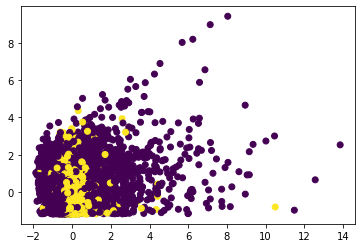

In [151]:
dataset_scaled = sklearn.preprocessing.scale(dataset2)
plt.scatter(dataset_scaled[:,0],dataset_scaled[:,1],c=labels)

## Naive Bayes Model
According to the Bayes' Theorem and the premise that all predictors are independent of one another, the Naive Bayes classifier divides data into multiple groups. It is assumed that the presence of other features in a class is unrelated to the existence of a particular feature in that class.
According to the Bayes'Theorem:

P(c | x) = P(x | c) P(c)/P(x)

The letters ‘c' and ‘x' in this equation stand for class and characteristics, respectively. The posterior probability of class according to the predictor is P(c/x). P(x) is the predictor's prior probability, and P(c) is the class's prior probability. The probability of the prediction according to the class is shown by P(x/c).

### Splitting the data into train and test test using K-fold Cross Validation

Here k-fold cross validation is used to estimate the skill of the model on the data.The dataset is split into k folds by shuffling the data randomly and each fold is used to fit the model and predict the score

The classifier is fit and trained and a prediction is made.The scores are also calculated.This score shows the accuracy score of the model.

In [373]:
import numpy as np
X_folds = np.array_split(dataset2, 3)
y_folds = np.array_split(labels, 3)
scores = list()
predict=list()
actual=list()
nb_classifier=GaussianNB()

for k in range(3):
    # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    predict.append(nb_classifier.fit(X_train, y_train).predict(X_test))
    actual.append(y_test)
    scores.append(nb_classifier.fit(X_train, y_train).score(X_test, y_test))
    
    
print(predict)
print(actual)
print(scores)  

[array([0., 0., 0., ..., 1., 1., 0.]), array([1., 0., 1., ..., 1., 1., 1.]), array([1., 0., 0., ..., 0., 0., 1.])]
[array([0., 0., 0., ..., 1., 0., 1.]), array([1., 1., 0., ..., 1., 1., 0.]), array([1., 0., 0., ..., 1., 1., 0.])]
[0.7549490101979605, 0.7398739873987399, 0.7422742274227423]


Here we have split the data into k folds with the value of 3 and calculated the score for each folds.It is observed that the cross validation scores for the three folds are 0.7549490101979605, 0.7398739873987399, 0.7422742274227423 respectively

### Confusion Matrix

A confusion matrix is a technique for summarizing the performance of a classification algorithm

The F-score is a method of combining the model's accuracy and recall, and it is defined as the harmonic mean of the precision and recall of the model.

Recall is a statistic that measures how many correct positive predictions were produced out of all possible positive predictions. Unlike precision, which only considers the right positive predictions out of all positive predictions, recall considers the positive predictions that were missed.

In [372]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

[[1273  515]
 [ 302 1244]]
[[1251  473]
 [ 394 1215]]
[[1291  509]
 [ 350 1183]]
[0.7527987897125566, 0.7370336669699727, 0.7336434108527131]
[0.8046571798188874, 0.7551274083281542, 0.771689497716895]


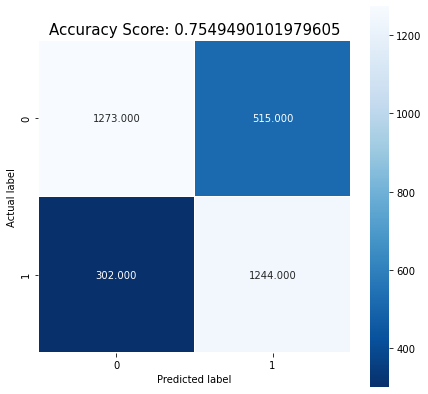

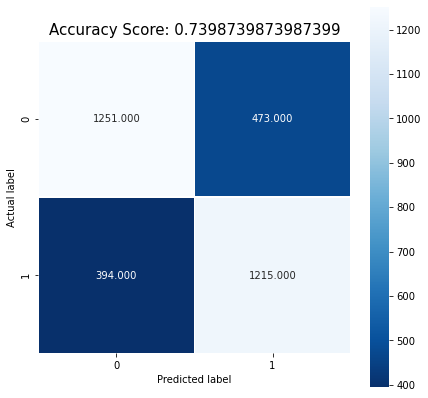

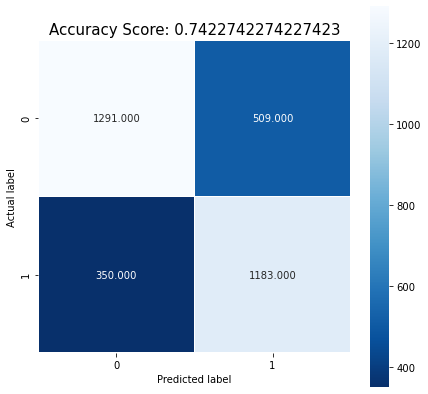

In [390]:
f1score_val= []
recallscore_val= []
for i in range(0,3):
    confusion = metrics.confusion_matrix(actual[i], predict[i])
    print(confusion)
    plt.figure(figsize=(7,7))
    sns.heatmap(confusion, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(scores[i])
    plt.title(all_sample_title, size = 15);
    f1score=f1_score(actual[i], predict[i])
    f1score_val.append(f1score)
    recallscore=recall_score(actual[i], predict[i])
    recallscore_val.append(recallscore)
print(f1score_val)
print(recallscore_val)

In [384]:
mean_f1_score=sum(f1score_val)/len(f1score_val)
mean_recall_score=sum(recallscore_val)/len(recallscore_val)
mean_accuracy_score=sum(scores)/len(scores)

In [385]:
print("The F1 score of the model is",mean_f1_score)
print("The recall score of the model is",mean_recall_score)
print("The accuracy of the model is",mean_accuracy_score)

The F1 score of the model is 0.7411586225117475
The recall score of the model is 0.7771580286213121
The accuracy of the model is 0.7456990750064808


The confusion matrix is predicted by taking the actual and predicted value as parameters for all the three folds.We can see that the model contains more True Positives and True Negatives.The model predict the data with the accuracy of around 75% percent

### ROC Curve
A Receiver operating characteristic curve (ROC curve) is a graph that shows how well a classification model performs across all categorization levels. Two parameters are shown on this curve:

True Positive Rate
False Positive Rate

TPR vs. FPR at various categorization criteria is plotted on a ROC curve. As the classification threshold is lowered, more items are classified as positive, resulting in an increase in both False Positives and True Positives. A typical ROC curve is seen in the diagram below.

In [191]:
from sklearn.metrics import plot_roc_curve

In [199]:
predict

[array([0., 0., 0., ..., 1., 1., 0.]),
 array([1., 0., 1., ..., 1., 1., 1.]),
 array([1., 0., 0., ..., 0., 0., 1.])]

In [200]:
actual

[array([0., 0., 0., ..., 1., 0., 1.]),
 array([1., 1., 0., ..., 1., 1., 0.]),
 array([1., 0., 0., ..., 1., 1., 0.])]

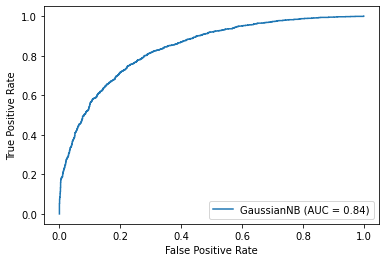

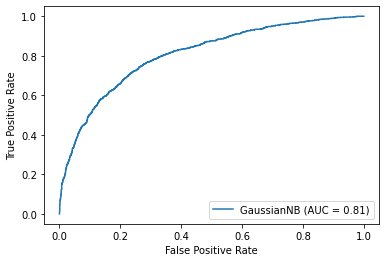

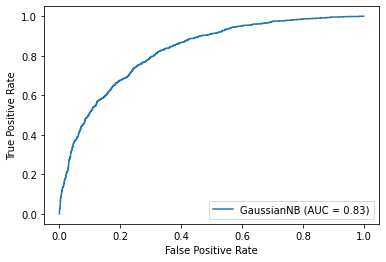

In [327]:
for k in range(3):
    # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    nb_classifier.fit(X_train, y_train).predict(X_test)
    metrics.plot_roc_curve(nb_classifier,X_test,y_test)  
    plt.show()
    

In [292]:
from sklearn.model_selection import cross_val_score

This is a simple method of getting the cross validation score by passing the number of folds along with the given dataset and corresponding labels

In [293]:
cross_val_score(nb_classifier, dataset2, labels, cv=3, scoring='precision_macro')

array([0.75669691, 0.7412205 , 0.74521312])

As the algorithm works well for real time prediction,our dataset is one of it which can predict the type of event

### Working of Naive Bayes Classification on the data

The classification method is based on Bayes Theorrom and the premise of predictor independence. A Naive Bayes classifier assumes that the presence of one feature in a class is unrelated to the presence of any other feature.

We must predict the sort of event in our dataset, which might be either background or signal. Each column corresponds to a separate occurrence, with columns for each measurement. All of these things work together to predict an occurrence, which is why it's referred to as Naive.

This can be used to classify large datasets.Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:
P(c | x) = P(x | c) P(c)/P(x)

Here the dataset is first converted into a frequency table.It is then followed by creation of likelihood table by finding the probablities and as the final step it is used to calculate the posterior probablity for each class.The class with highest posterior probablity will be the outcome of prediction.

Since the values are not discrete and follows a continuous distribution it followed a Gaussian distribution.Here probablity of likelihoods are computed by plugging in the probablity density function.Here substitute the corresponding probability density of a Normal distribution and call it the Gaussian Naive Bayes. The mean and variance of the values are needed for computing this.


## Logistic Regression
Logistic Regression is a Machine Learning technique for resolving categorization problems. It is a probability-based predictive analytic method. Instead of using a linear function, it employs a cost function known as the 'Sigmoid function' or the 'logistic function'.According to the logistic regression hypothesis, the cost function should be confined to a value between 0 and 1. As a result, linear functions fail to characterise it since it might have a value more than 1 or less than 0, which the logistic regression hypothesis states is not possible.

### Splitting the data into train and test
The same as discussed above for naive bayes is performed using k fold validation.The model is then fit and value is predicted.Similarly the cross validation and accuracy score is found for all the three folds

In [376]:
scores_log = list()
predict_log=list()
actual_log=list()
log_classifier=LogisticRegression()
for k in range(3):
    X_train_1 = list(X_folds)
    X_test_1 =  X_train_1.pop(k)
    X_train_1 = np.concatenate(X_train_1)
    y_train_1 = list(y_folds)
    y_test_1 = y_train_1.pop(k)
    y_train_1 = np.concatenate(y_train_1)
    predict_log.append(log_classifier.fit(X_train_1, y_train_1).predict(X_test_1))
    actual_log.append(y_test_1)
    scores_log.append(log_classifier.fit(X_train_1, y_train_1).score(X_test_1, y_test_1))
    
print(predict_log)
print(actual_log)
print(scores_log)  

[array([0., 0., 0., ..., 1., 1., 0.]), array([1., 0., 1., ..., 1., 0., 0.]), array([1., 1., 1., ..., 0., 0., 0.])]
[array([0., 0., 0., ..., 1., 0., 1.]), array([1., 1., 0., ..., 1., 1., 0.]), array([1., 0., 0., ..., 1., 1., 0.])]
[0.7231553689262148, 0.6882688268826883, 0.6960696069606961]


[[1382  406]
 [ 517 1029]]
[[1305  419]
 [ 620  989]]
[[1312  488]
 [ 525 1008]]
[0.6903723582690372, 0.6556181637388134, 0.6655661934631891]
[0.6655886157826649, 0.6146674953387197, 0.6575342465753424]


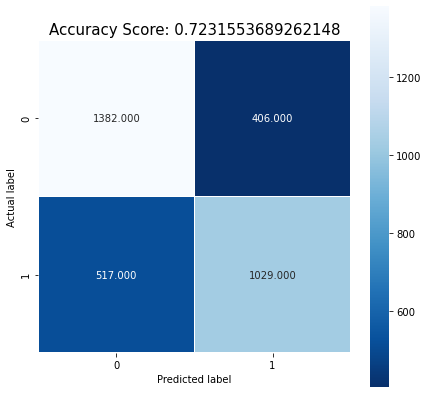

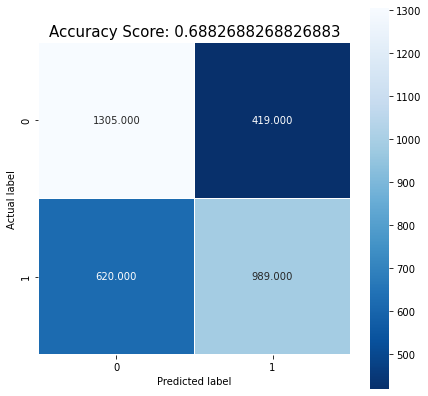

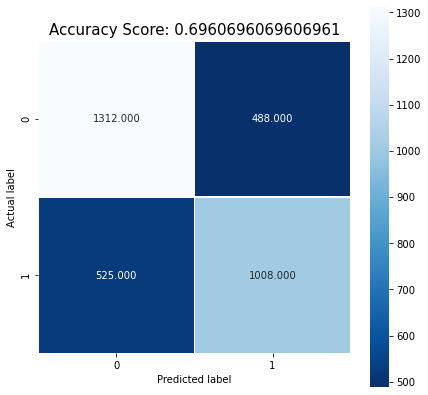

In [377]:
f1score_log_val= []
recallscore_log_val= []
for i in range(0,3):
    confusion_log = metrics.confusion_matrix(actual_log[i], predict_log[i])
    print(confusion_log)
    plt.figure(figsize=(7,7))
    sns.heatmap(confusion_log, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(scores_log[i])
    plt.title(all_sample_title, size = 15);
    f1score_log=f1_score(actual_log[i], predict_log[i])
    f1score_log_val.append(f1score_log)
    recallscore_log=recall_score(actual_log[i], predict_log[i])
    recallscore_log_val.append(recallscore_log)
print(f1score_log_val)
print(recallscore_log_val)

In [382]:
mean_f1_score_log=sum(f1score_log_val)/len(f1score_log_val)
mean_recall_score_log=sum(recallscore_log_val)/len(recallscore_log_val)
mean_accuracy_score_log=sum(scores_log)/len(scores_log)

In [383]:
print("The F1 score of the model is",mean_f1_score_log)
print("The recall score of the model is",mean_recall_score_log)
print("The Accuracy of the model is ",mean_accuracy_score_log)

The F1 score of the model is 0.6705189051570133
The recall score of the model is 0.6459301192322423
The Accuracy of the model is  0.7024979342565331


This has more true positives and true negatives.The model gives an accuray score of around 70 percent.

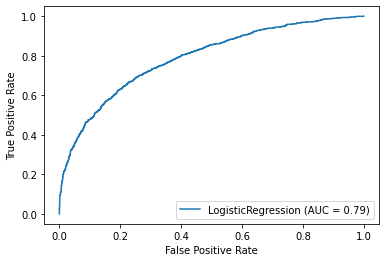

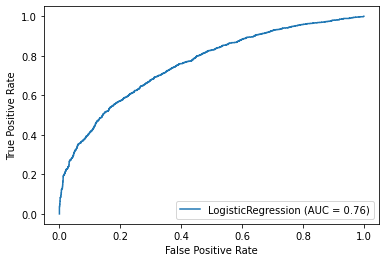

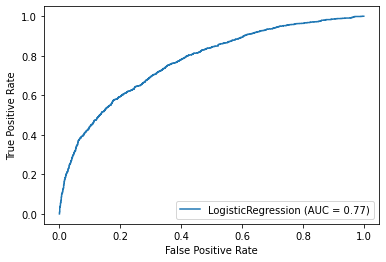

In [227]:
for k in range(3):
    # We use 'list' to copy, in order to 'pop' later on
    X_train_1 = list(X_folds)
    X_test_1 = X_train_1.pop(k)
    X_train_1 = np.concatenate(X_train_1)
    y_train_1 = list(y_folds)
    y_test_1 = y_train_1.pop(k)
    y_train_1 = np.concatenate(y_train_1)
    log_classifier.fit(X_train_1, y_train_1).predict(X_test_1)
    metrics.plot_roc_curve(log_classifier,X_test_1,y_test_1)  
    plt.show()

In [294]:
cross_val_score(log_classifier, dataset2, labels, cv=3, scoring='precision_macro')

array([0.71302882, 0.69118228, 0.69670361])

The confusion metrics and ROC have been plotted for the Logistic Regression model same as that of Naive BAyes.

### Working of Logistic Regression on Dataset

By showing the probability scores of the dependent variables, logistic regression seeks to quantify the association between a categorical dependent variable and one or more independent variables (typically continuous).This predicts the value only when the data can take two values and is linearly separable

Here in our data we have to classify it based on the two events,either a backgroud or signal event.it is used to predict the likelihood of a class or event. The training data is utilised to estimate the value of the parameters utilised in the prediction equation.The output lies between 0 and 1.

### Comparison of Naive Bayes and Logistic Regression on the model.

The chance of a given feature vector being linked with a label is calculated using the Nave Bayes classification technique, which is based on Bayes' theorem. The naïve assumption of conditional independence for each feature in the Nave Bayes algorithm indicates that the method assumes that the features are independent, which is not necessarily the case.
Logistic regression is a linear classification approach that determines the likelihood of a sample falling into a specific category. The goal of logistic regression is to discover the appropriate decision boundary for separating the classes.

In our example both the models are used to predict whether the event generated by the  by a simulation of the ATLAS detector is a bacground or signal event.The joint distribution of the feature X and the target Y is modelled by Naive Bayes, which then predicts the posterior probability given as P(y|x).By learning the input to output mapping and minimising the error, logistic regression directly predicts the posterior probability of P(y|x).

While seeing the output prediction we can conclude that naive bayes works well than logistic regression for this dataset.Although there are not much differnce in the accuracy score,the naive bayes performed well.Also the number of true positives and true negative rates were more for naive bayes than that of logistic regression.

### Conclusion

On performing analysis on the ATLAS dataset for predicting the events as background and signal,two diffrent models were tried.Analysis were performed by fitting the model and predicting the results.The two models used were Naive Bayes and Logistic Regression.The conclusion from the results include:
* The TPR and FPR were compared and the AUC was obtained.The more the value of AUC,the stronger is the TPR.Since Naive Bayes have greater value for ROC than Logistic Regression,Naive Bayes is better
* On predicting the confusion matrix,Naive Bayes has a strong value in right diagonal than Logistic Regression ,So it performs better.
* Accuracy score of Naive Bayes model(74.5) is more than that of Logistic Regression(70.2)
* Naive Bayes has a higher F1 and Recall score(0.74,0.77) compared to Logistic Regression(0.67,0.64)

Overall the Naive Bayes model performed well and performed better than Logistic Regression Model for our dataset.
    